# Exercise with Marathon DataSet

## Montar el drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importar librerias 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Cargar DataSet

In [9]:
df = pd.read_csv('/content/drive/MyDrive/machine_learning/MarathonData.csv')
df

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


## Conociendo los Datos

In [12]:
df['MarathonTime']

0     2.37
1     2.59
2     2.66
3     2.68
4     2.74
      ... 
82    3.93
83    3.93
84    3.94
85    3.95
86    3.98
Name: MarathonTime, Length: 87, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


## Conversion de columnas de String/Objeto a Int

In [14]:
df['Wall21'] = pd.to_numeric(df['Wall21'], errors='coerce')

## Ver información estadística del Data Frame

In [15]:
df.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


## Histograma de Datos Númericos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9ece3e410>,
      dtype=object)

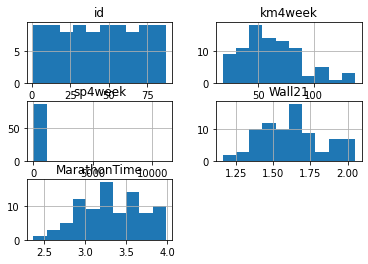

In [19]:
df.hist()


## Escoger campos más importantes o Preparar Datos

In [20]:
df

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


In [21]:
df.keys()

Index(['id', 'Marathon', 'Name', 'Category', 'km4week', 'sp4week',
       'CrossTraining', 'Wall21', 'MarathonTime', 'CATEGORY'],
      dtype='object')

## Campos mas importantes 
Estos son las columnas o campos mas importantes a trabajar con el Data Set:

```
1.Category
2.km4week
3.sp4week
4.CrossTraining
5.Wall21
6.MarathonTime
```



## Eliminar las columnas que no se necesitan

In [22]:
df = df.drop(columns=['Name'])
df = df.drop(columns=['id'])
df = df.drop(columns=['Marathon'])
df = df.drop(columns=['CATEGORY'])

In [23]:
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,NaN,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,NaN,1.94,3.94
85,M45,33.2,11.066667,NaN,2.05,3.95


## Limpiar DataSet y dejarlo listo para Trabajar 

In [24]:
df.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
dtype: int64

## Rellenar campos nulos con Ceros

In [25]:
df['CrossTraining'] = df['CrossTraining'].fillna(0)
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


## Eliminar Registros 

In [26]:
df = df.dropna(how= 'any')
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


## Convertir valores no Númericos a Números

In [27]:
df['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

In [30]:
valores_cross = { "CrossTraining" :{'ciclista 1h':1, 'ciclista 4h':2, 'ciclista 13h':3, 'ciclista 3h':4, 'ciclista 5h':5}}
#df.replace(valores_cross, inplace=True)
df

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,4,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [31]:
df['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [32]:
valores_category = {'Category':{'MAM':1, 'M45':2, 'M40':3, 'M50':4, 'M55':5, 'WAM':6}}
df.replace(valores_category, inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,4,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


## Entrenamiento Revisar correlación  entre variable principal y las demas

### Graficar Marathon Time y km4week

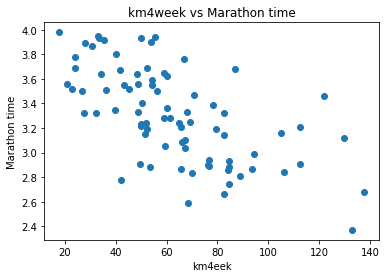

In [33]:
plt.scatter(x = df['km4week'], y= df['MarathonTime'])
plt.title('km4week vs Marathon time')
plt.xlabel('km4eek')
plt.ylabel('Marathon time')
plt.show()

### Grafica Marathon Time vs sp4week

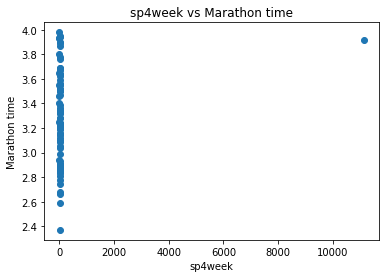

In [34]:
plt.scatter(x = df['sp4week'], y= df['MarathonTime'])
plt.title('sp4week vs Marathon time')
plt.xlabel('sp4week')
plt.ylabel('Marathon time')
plt.show()

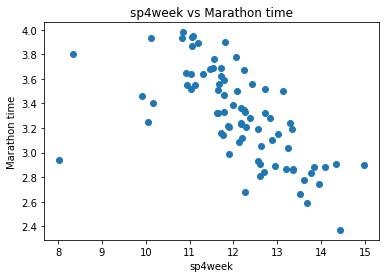

In [36]:
df = df.query('sp4week<2000')
plt.scatter(x = df['sp4week'], y= df['MarathonTime'])
plt.title('sp4week vs Marathon time')
plt.xlabel('sp4week')
plt.ylabel('Marathon time')
plt.show()

### Grafica Wall21 vs Marathon Time

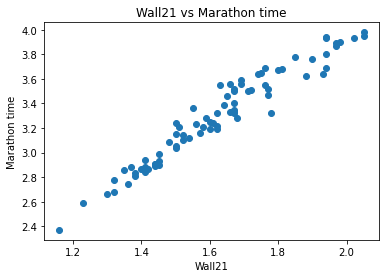

In [37]:
plt.scatter(x = df['Wall21'], y= df['MarathonTime'])
plt.title('Wall21 vs Marathon time')
plt.xlabel('Wall21')
plt.ylabel('Marathon time')
plt.show()

## Dividir Conjunto de Datos

In [38]:
d_train = df.sample(frac=0.8, random_state=0)
d_test = df.drop(d_train.index)
d_train

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
54,3,70.7,11.783333,0,1.77,3.47
28,2,51.6,13.008403,0,1.50,3.15
31,1,79.4,13.344538,0,1.60,3.19
84,3,55.4,11.043189,0,1.94,3.94
47,2,39.6,12.247423,0,1.67,3.35
...,...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67,3.50
20,1,94.5,11.886792,0,1.45,2.99
79,1,53.9,11.802920,0,1.98,3.90
8,1,70.0,13.770492,1,1.38,2.83


### Separar variable de predicción de las demás

In [39]:
tags_train = d_train.pop('MarathonTime')
tags_test = d_test.pop('MarathonTime')

In [40]:
tags_train

54    3.47
28    3.15
31    3.19
84    3.94
47    3.35
      ... 
55    3.50
20    2.99
79    3.90
8     2.83
13    2.88
Name: MarathonTime, Length: 64, dtype: float64

## Entrenamiento

In [41]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(d_train,tags_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Validación, realizar algunas predicciones




In [42]:
predictions = modelo.predict(d_test)
predictions

array([2.79262937, 2.82359947, 3.05763355, 3.04142169, 3.06227741,
       3.29594219, 3.36224805, 3.36333935, 3.17791435, 3.29370445,
       3.38283165, 3.52761738, 3.59840905, 3.51797973, 3.67914137,
       3.82232527])

### Se comparan los datos de las predicciones con la etiqueta de la variable de predicción del subconjunto de validación

In [44]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(tags_test, predictions))
print("Error porcentual: %f" %(error*100))

Error porcentual: 11.209769


##Se crea un nuevo registro y se analiza cómo es el resultado

In [45]:
new_runner = pd.DataFrame(np.array([[1,400,20,0,1.4]]),columns=['Category', 'km4week', 'sp4week','CrossTraining', 'Wall21'])
new_runner

,Category,km4week,sp4week,CrossTraining,Wall21
0,1.0,400.0,20.0,0.0,1.4


In [46]:
modelo.predict(new_runner)

array([2.15535773])